In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [53]:
#training dataset
df = pd.read_csv('Training.csv')
df.drop('Unnamed: 133', axis=1, inplace=True)

In [54]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [55]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [56]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hep

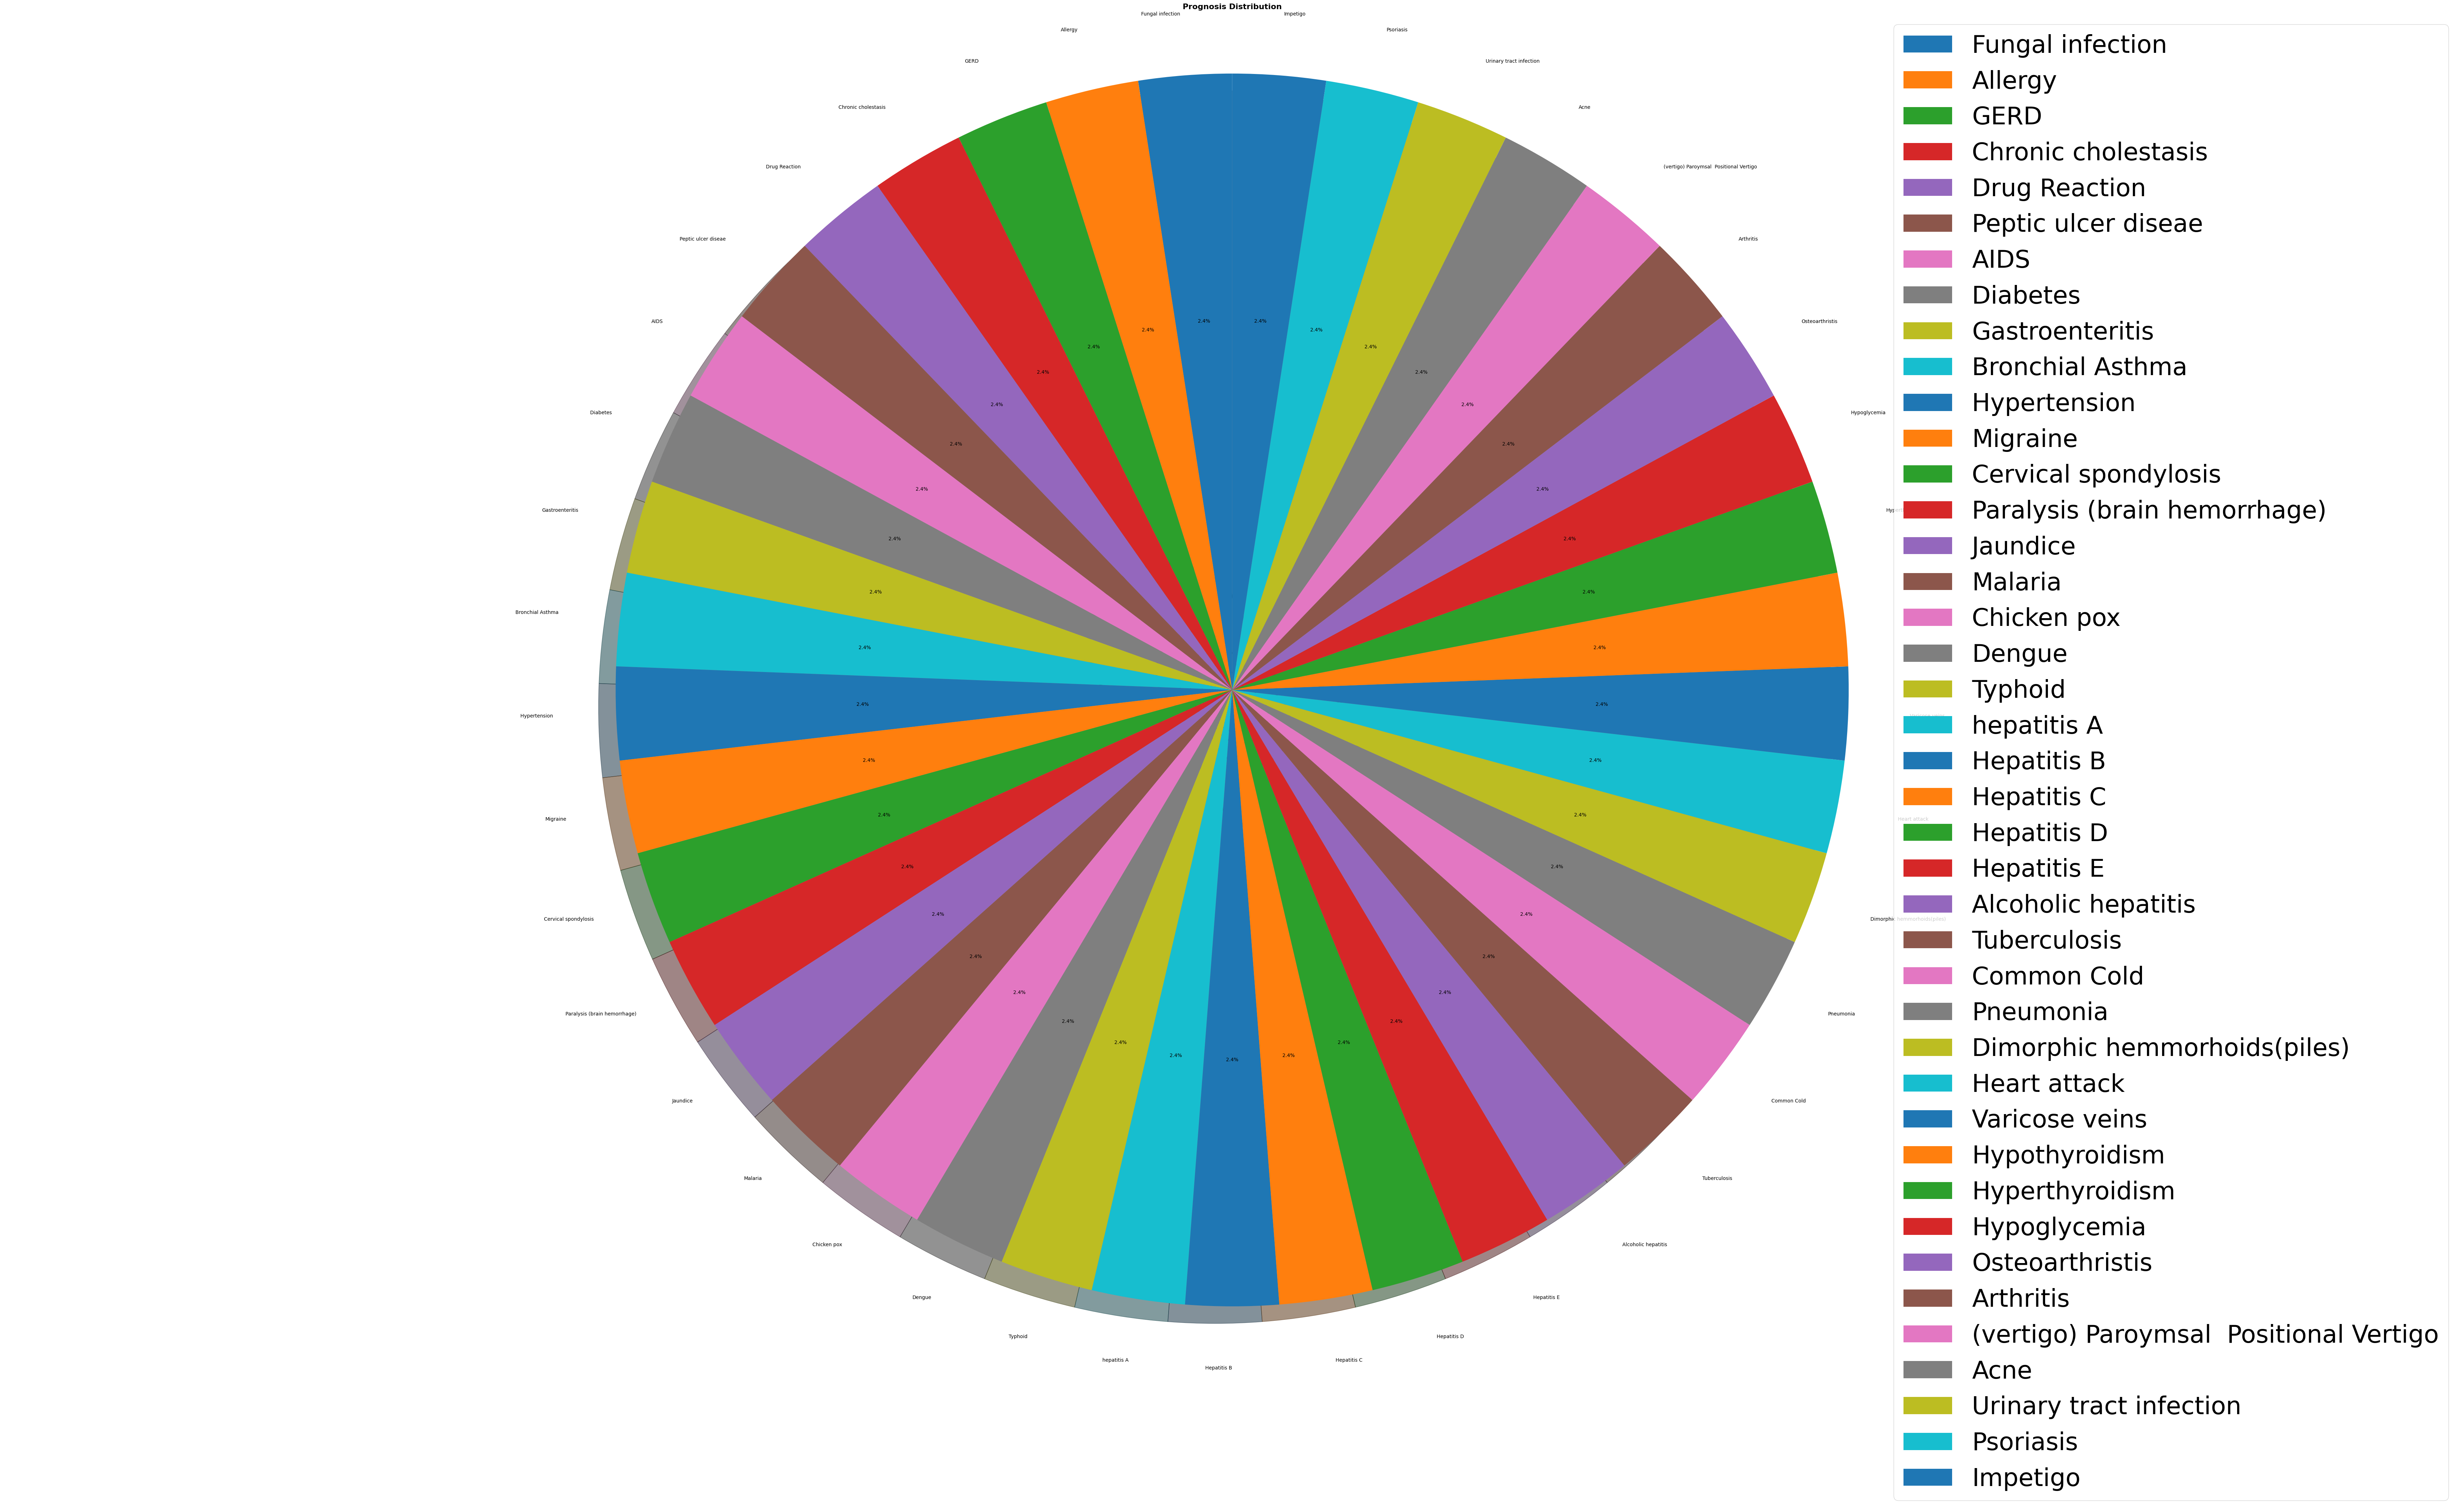

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90, 50))

category_counts = df['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=16, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=50)
plt.axis('equal')

plt.show()

In [59]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [63]:
df1 = df.drop('prognosis', axis=1)

In [64]:
df1.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0         0             0   
1                   0           0         0             0   
2                   0           0         0             0   
3                   0           0         0             0   
4                   0           0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   
3                    0                     0                   0        0   
4                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  

[5 rows x 132 columns]

/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


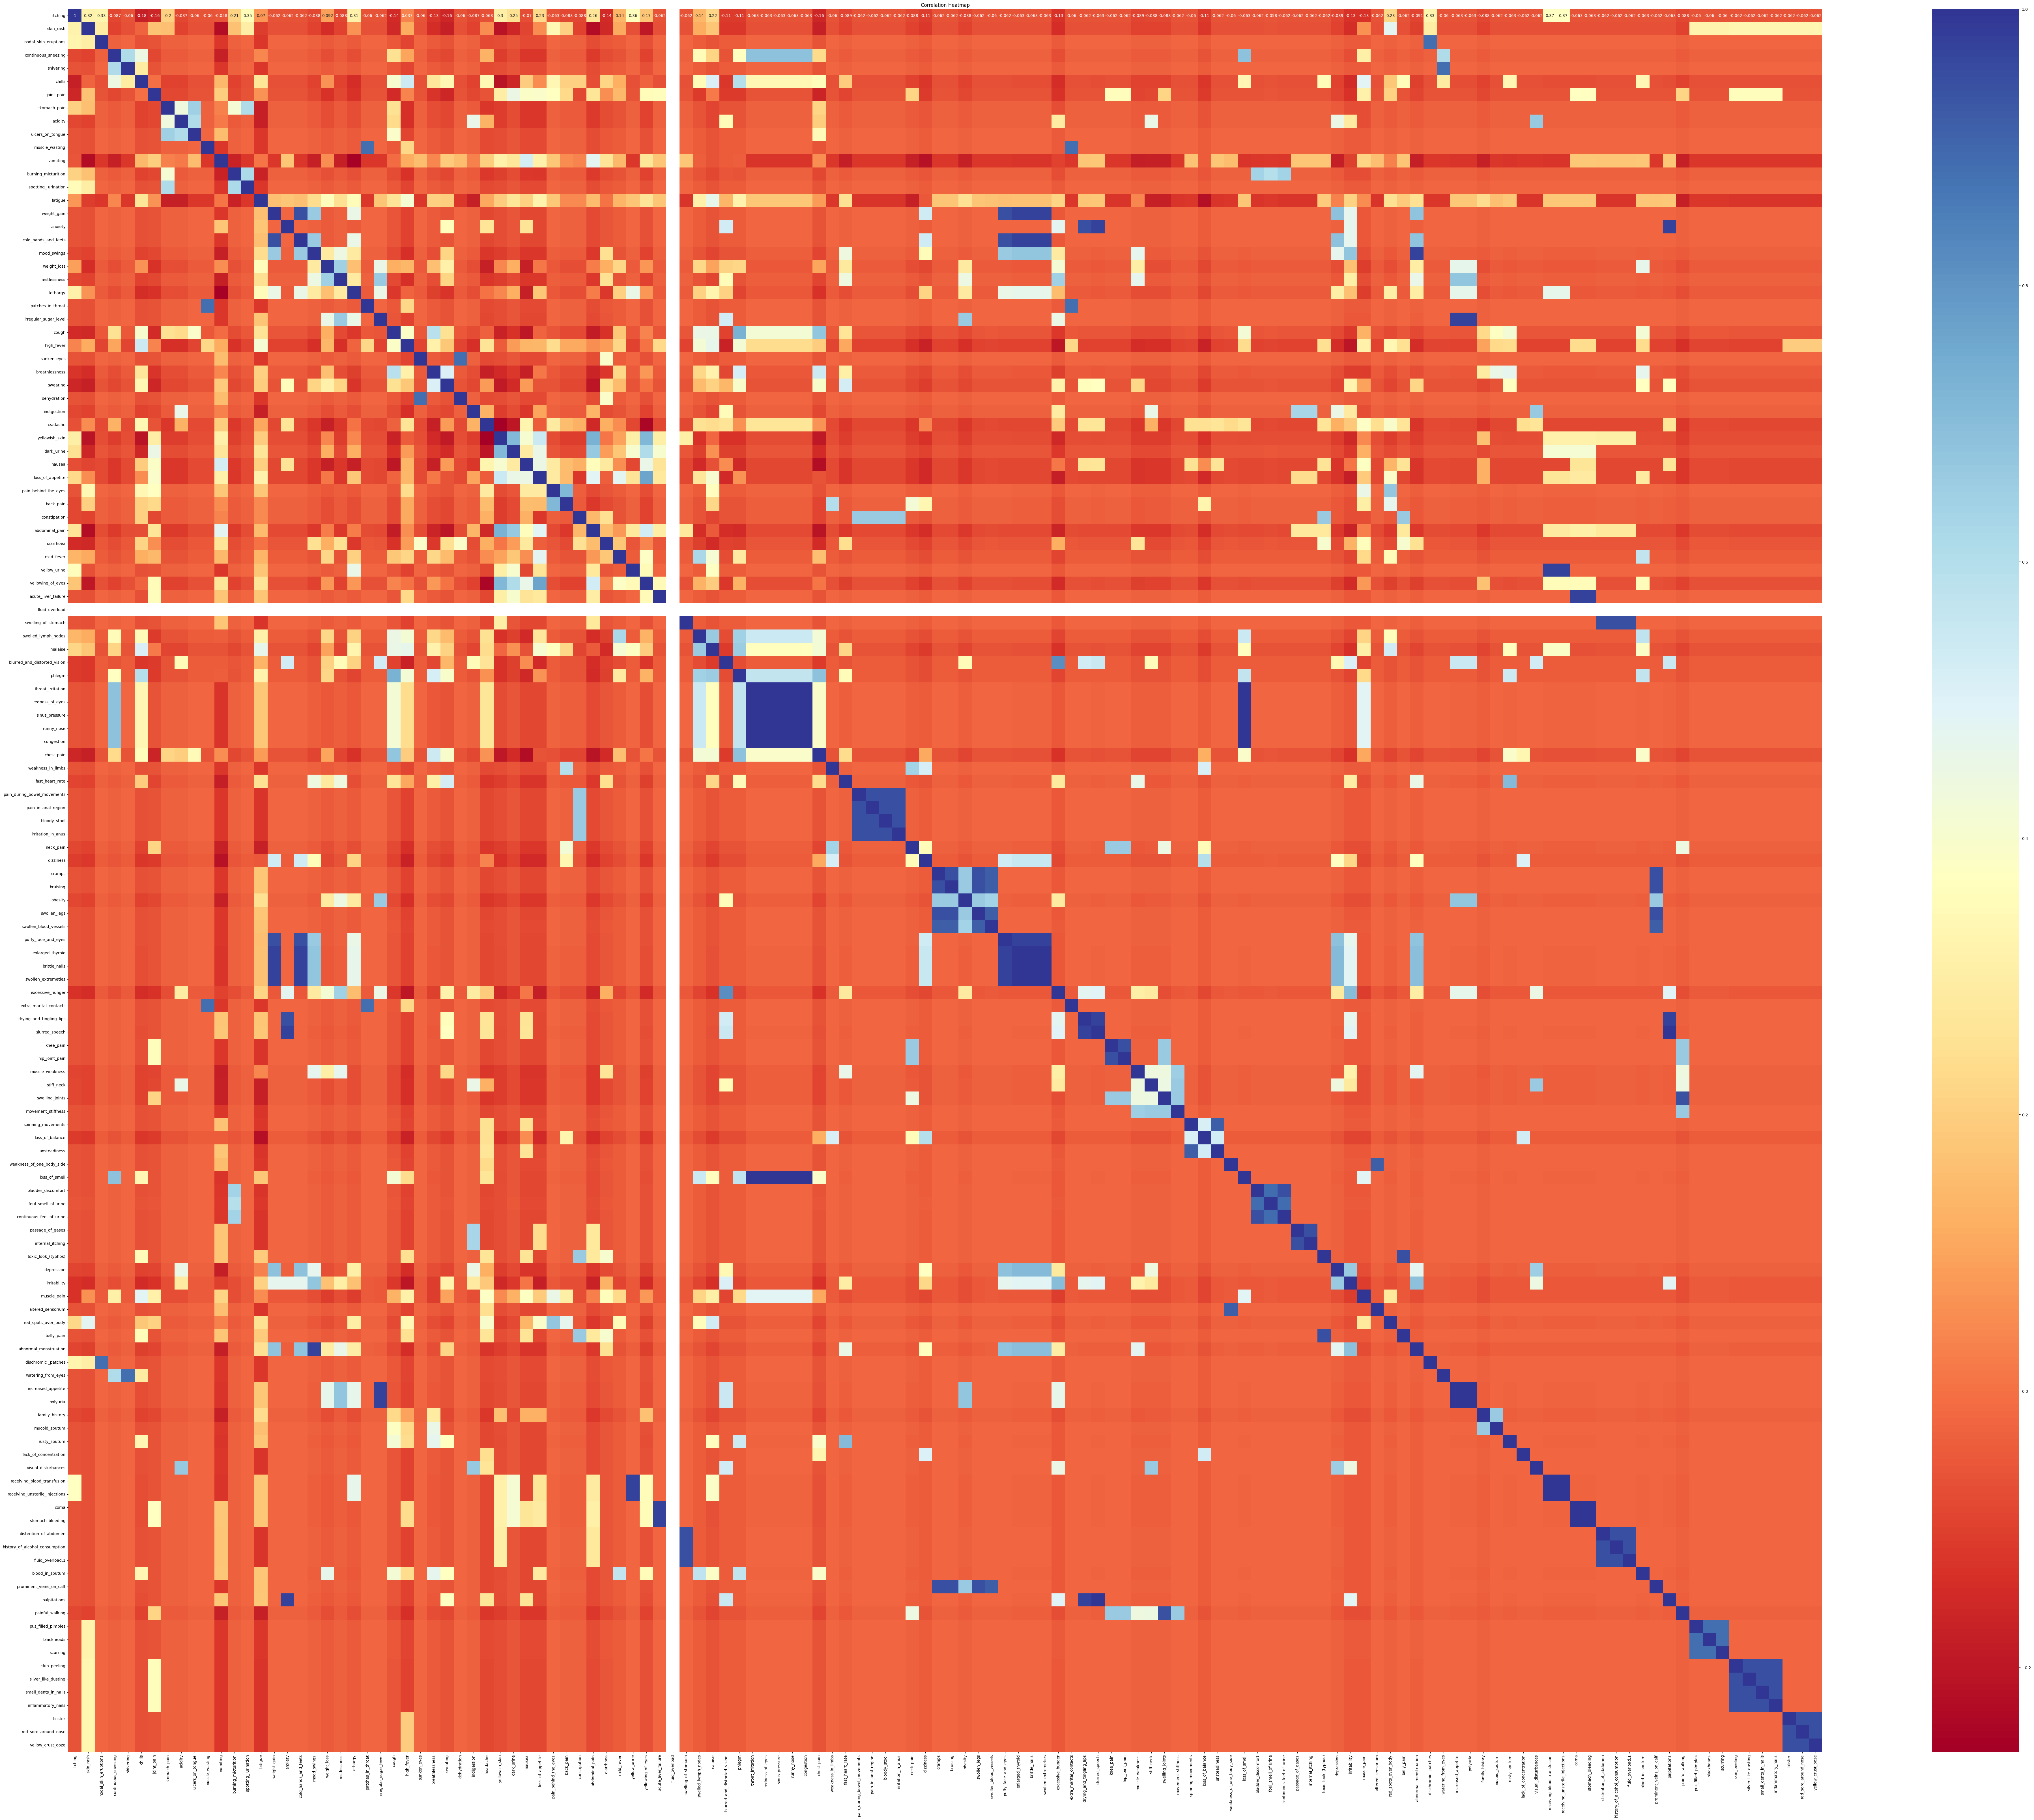

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Compute correlation matrix
corr_matrix = df1.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(100, 80))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Heatmap')
plt.show()

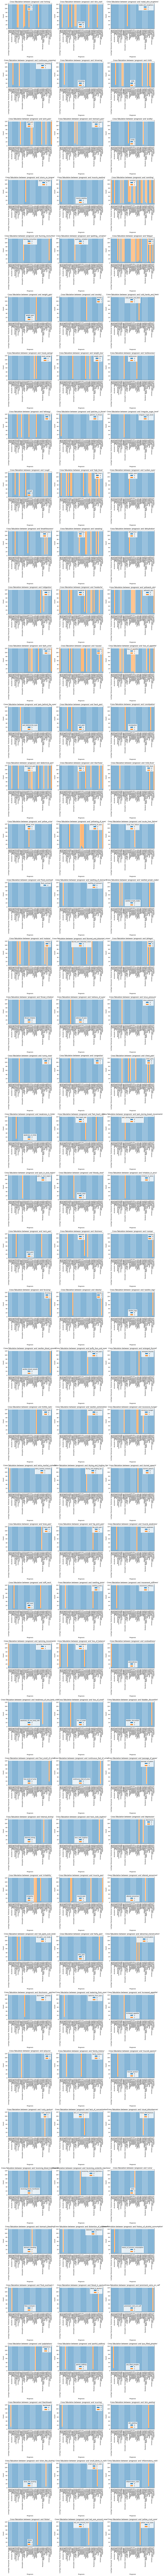

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Get the number of columns (excluding 'prognosis')
num_columns = len(df.columns) - 1

# Calculate the number of rows and columns for the subplots grid
num_rows = int((num_columns + 2) / 3)  # Adjust the number of rows as needed
num_cols = 3  # Set the number of columns per row

# Calculate the figure size based on the number of rows and columns
fig_width = 16
fig_height = 6 * num_rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns (excluding 'prognosis') and create the bar plots
for i, column in enumerate(df.columns):
    if column != 'prognosis':
        cross_tab = pd.crosstab(df['prognosis'], df[column])
        ax = axes[i]

        cross_tab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        ax.set_xlabel('Prognosis')
        ax.set_ylabel('Count')

# Hide the extra subplots if there are more axes than columns
if len(axes) > num_columns:
    for ax in axes[num_columns:]:
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()

In [67]:
x = df.drop('prognosis', axis = 1)
y = df['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [68]:
# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_acc = accuracy_score(y_test, tree_pred)

print("Decision Tree Classifier:")
print("Accuracy on test set: {:.2f}%".format(tree_acc * 100))

Decision Tree Classifier:
Accuracy on test set: 100.00%


In [69]:
# Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
forest_acc = accuracy_score(y_test, forest_pred)

print("Random Forest Classifier:")
print("Accuracy on test set: {:.2f}%".format(forest_acc * 100))

Random Forest Classifier:
Accuracy on test set: 100.00%


In [70]:
# Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_confidence = logreg.predict_proba(x_test)

print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))

# Print confidence scores for Logistic Regression predictions
print("Confidence scores for Logistic Regression predictions:")
print(logreg_confidence)

Logistic Regression Classifier:
Accuracy on test set: 100.00%
Confidence scores for Logistic Regression predictions:
[[1.22808611e-03 2.83049596e-03 9.20279014e-01 ... 3.00140248e-03
  1.58406980e-03 4.13225204e-04]
 [1.70227182e-04 3.75490345e-04 9.89681822e-01 ... 3.96491089e-04
  2.17522351e-04 5.85306105e-05]
 [4.22994046e-05 1.40963799e-04 1.82123188e-04 ... 1.91949795e-04
  2.22990497e-04 6.21754974e-05]
 ...
 [2.47720978e-04 2.34021313e-04 2.26530922e-04 ... 2.47724443e-04
  1.14461556e-04 3.52243957e-05]
 [5.68839030e-05 1.74076521e-04 1.87623456e-04 ... 2.06504651e-04
  2.52151987e-04 1.77737635e-05]
 [8.62838785e-04 2.02390803e-04 3.24345368e-04 ... 7.08377112e-05
  1.71079095e-04 7.91633186e-04]]


In [71]:
import pickle

# Assuming you have a logistic regression model named 'logistic_regression_model'

# Save the model to a file using pickle
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(logreg, file)

In [72]:
z=[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Reshape the input data to match the number of features
z_reshaped = np.array(z).reshape(1, -1)  # Reshape z to have the same number of features as the training data

logreg_confidence = logreg.predict_proba(z_reshaped)
print(logreg_confidence)
logreg_pred = logreg.predict(z_reshaped)
print(logreg_pred)
max_confidence = max(logreg_confidence[0])
print("Maximum confidence:", max_confidence)

[[1.15063883e-03 2.54495474e-03 1.08678027e-02 1.13356343e-03
  3.33633751e-03 2.13274777e-03 1.38564869e-03 2.20609465e-03
  3.47399658e-03 4.92816114e-03 4.35736956e-04 5.34860375e-04
  9.47295483e-04 2.38286727e-03 2.71933635e-02 8.95604250e-01
  1.25363925e-03 2.77402627e-03 2.60053630e-03 1.10444587e-03
  1.09986218e-03 1.57310258e-04 2.10014822e-04 1.90664159e-03
  7.68015558e-04 5.04880790e-04 7.77928199e-04 6.76481804e-03
  2.23761612e-03 6.14357494e-04 1.13338856e-03 1.69198060e-03
  2.37239556e-03 1.28156231e-03 6.56621991e-04 4.86440585e-03
  2.13229715e-04 3.53729984e-04 2.51845376e-03 1.53346466e-03
  3.48354580e-04]]
['Fungal infection']
Maximum confidence: 0.895604250109039


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
